# Visualization Handbook - Part 2

This notebook presents code for the visualization of our most salient findings related to sentiment scores, embeddings, and lyric themes. We will:

1. Explore and visualize lyric embeddings by grouping them by themes and projecting them into 2D space using TSNE
2. Visualize sentiment changes over time
3. Visualize sentiment distribution over time by theme using density plots

In [2]:
import pandas as pd
import os
import numpy as np

from sklearn.cluster import KMeans

# Viz 
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

# Type transformation
import ast

In [5]:
os.getcwd()
os.chdir('/Users/ez/Desktop/final-project-data-oven-load/data')

In [9]:
# Load data
merged_df = pd.read_csv("/Users/ez/Downloads/merged_data.csv")

In [10]:
print(merged_df.shape)
merged_df[:2]

(30490, 11)


,date,song,artist,peak-rank,max-weeks-on-board,lyrics,embedding,themes,average_positive,average_negative,fully_available
0,1990-08-11,"""B"" Girls",Young And Restless,54,15.0,"\n\nHey, Slim. Come here, check this out\nUh-u...","[0.046063587069511414, -0.027632707729935646, ...","Adventure, Wealth, Individuality, Violence",0.0,0.004921,True
1,1973-05-19,"""Cherry Cherry"" from Hot August Night",Neil Diamond,31,10.0,Lyrics not available,NaN,NaN,0.0,0.000331,False


### Reformat MERGED_DF

In [12]:
# Extract four-digit year value from "date" into a separate column 
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['year'] = merged_df['date'].dt.year

# Average difference between sentiment (avg positive - avg negative)
# merged_df['diff_avg_senti'] = merged_df['average_positive'] - merged_df['average_negative']

# 1. Sentiment Analysis

<Axes: title={'center': 'Average positive sentiment of songs over the years'}, xlabel='Year', ylabel='Average positive sentiment'>

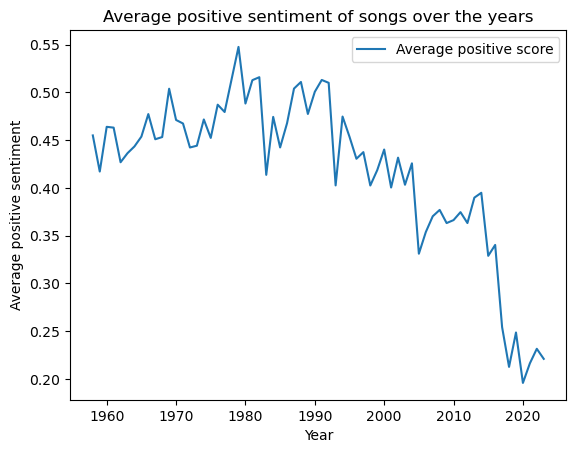

In [15]:
peak_df = merged_df.groupby("year")
peak_df = peak_df["average_positive"].mean() 
peak_df = peak_df.reset_index()
peak_df = peak_df.rename(columns={"average_positive" : "Average positive score"})
peak_df = peak_df.sort_values(by="year", ascending=True)
peak_df = peak_df.set_index("year")

peak_df.plot.line(title="Average positive sentiment of songs over the years", ylabel="Average positive sentiment", xlabel="Year")

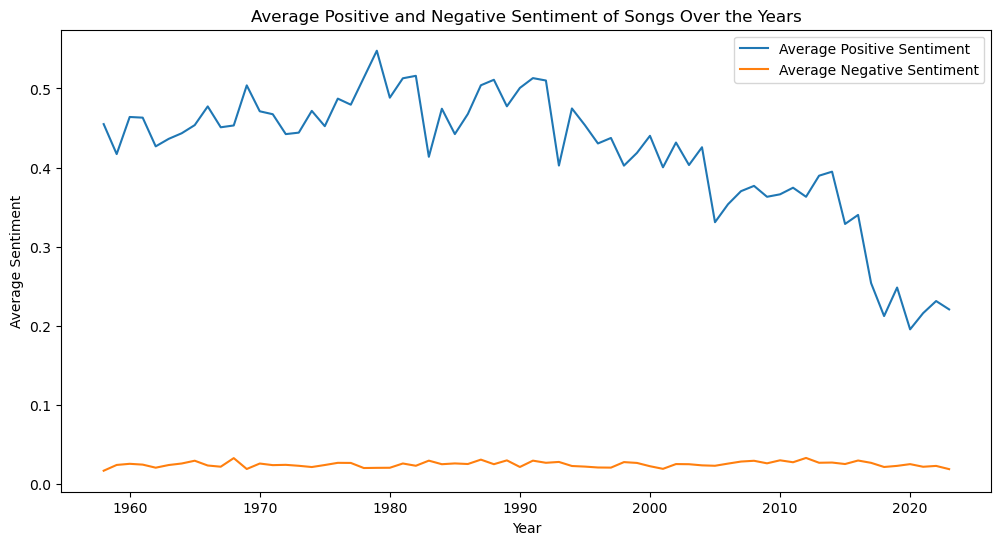

In [14]:
# Calculate the average negative sentiment
average_negative_df = merged_df.groupby("year")["average_negative"].mean()
average_negative_df = average_negative_df.reset_index()
average_negative_df = average_negative_df.rename(columns={"average_negative": "Average negative score"})
average_negative_df = average_negative_df.sort_values(by="year", ascending=True)
average_negative_df = average_negative_df.set_index("year")

# Plot both average positive and average negative sentiment on the same graph
plt.figure(figsize=(12, 6))
plt.plot(peak_df.index, peak_df["Average positive score"], label="Average Positive Sentiment")
plt.plot(average_negative_df.index, average_negative_df["Average negative score"], label="Average Negative Sentiment")
plt.xlabel("Year")
plt.ylabel("Average Sentiment")
plt.title("Average Positive and Negative Sentiment of Songs Over the Years")
plt.legend()
plt.show()

This plot shows a clear downward trend in positive sentiment (averaged by year).

# 2. Sentiment & Theme Analysis

### TSNE Embedding Viz

In [16]:
# Select relevant info
embeddings = merged_df[["year", "embedding"]]

In [17]:
embeddings = embeddings.dropna()

In [18]:
embeddings.set_index("year", inplace=True)

In [19]:
len(embeddings)
embeddings[:3]

,embedding
year,
1990,"[0.046063587069511414, -0.027632707729935646, ..."
2002,"[0.03235654905438423, -0.05264057219028473, -0..."
1978,"[0.04129776731133461, -0.029582589864730835, -..."


In [20]:
# Transform type
def transform_str_to_list(cell):
    """
    Identifies a string representation of a list, and turns this into a list literal.

    Inputs:
        (cell): the content of a cell in a df to evaluate.
    
    Returns: (list)
    """
    str_to_list = ast.literal_eval(cell)

    return str_to_list

In [21]:
expanded_embeddings = pd.DataFrame(embeddings['embedding'].apply(lambda x: transform_str_to_list(x)).to_list())

In [22]:
print(expanded_embeddings.shape)
expanded_embeddings[:4] # Hooray!

(25721, 1536)


,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,0.046064,-0.027633,-0.054285,-0.003982,-0.000732,0.017886,-0.019193,0.002661,-0.016566,0.003457,...,-0.024379,0.018485,0.001166,0.003675,0.003825,0.014266,-0.006343,-0.012108,0.014647,0.018009
1,0.032357,-0.052641,-0.052233,-0.030181,0.014384,-0.036544,-0.023384,0.017429,-0.020461,0.033906,...,0.003132,0.025070,-0.015240,-0.004157,0.004473,0.029502,-0.013378,0.007314,-0.000947,0.012433
2,0.041298,-0.029583,-0.048275,0.006311,0.006747,-0.012069,-0.018362,0.017455,-0.032223,-0.004266,...,-0.032670,-0.022511,0.008362,0.015828,-0.016371,0.049501,0.000234,0.040166,0.016123,0.001398
3,0.019706,-0.041598,-0.050314,-0.061492,0.018890,-0.014255,0.010255,0.021753,-0.038382,0.004635,...,-0.025773,-0.022507,-0.011925,-0.029540,-0.015474,0.050616,0.020309,-0.006151,0.004308,-0.034263


In [23]:
# Set index to Year
expanded_embeddings = expanded_embeddings.set_index(embeddings.index)

In [24]:
test_df_ebd = expanded_embeddings.sample(1000)

In [25]:
test_df_ebd[:3]

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
year,,,,,,,,,,,,,,,,,,,,,
1977,0.026668,-0.002603,-0.017562,0.010328,-0.006513,0.019511,-0.001204,0.018873,-0.032313,-0.016818,...,-0.009496,0.006992,-0.018720,0.004946,0.002622,0.021023,0.009626,0.004901,0.012377,0.000128
2018,0.050168,-0.051234,-0.024079,0.004670,0.006876,-0.025254,-0.001559,0.034769,-0.010200,-0.025544,...,-0.015811,0.004228,0.029733,0.006032,0.022881,0.030556,0.000804,0.026319,0.016767,-0.007318
2019,0.036553,-0.068591,-0.044787,0.013339,0.004765,0.001475,-0.001661,0.029730,-0.050379,-0.030371,...,-0.005400,0.001439,0.028421,-0.010068,0.020136,0.041247,0.006259,0.025369,0.034809,0.035501


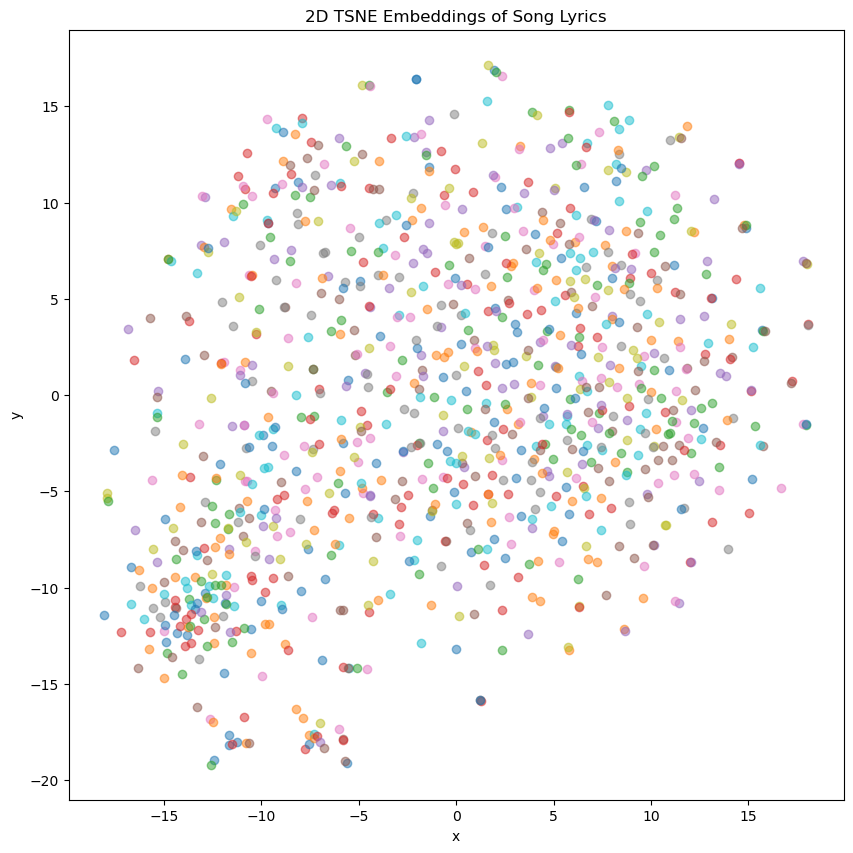

In [26]:
# visualize the embeddings using TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=50)

# Fit and transform the embeddings using TSNE
embeddings_2d = tsne.fit_transform(test_df_ebd)

# Create a DataFrame for the 2D embeddings

embedding_2d_df = pd.DataFrame(embeddings_2d, columns=['x', 'y'], index=test_df_ebd.index)

# Plot the 2D embeddings

# Group data by year
grouped_data = embedding_2d_df.groupby('year')

# Plot the 2D embeddings for each group
plt.figure(figsize=(10, 10))
for year, group in grouped_data:
    plt.scatter(group['x'], group['y'], alpha=0.5, label=year)

# plt.figure(figsize=(10, 10))
# plt.scatter(embedding_2d_df['x'], embedding_2d_df['y'], alpha=0.5, color=test_df_ebd.index)

plt.title('2D TSNE Embeddings of Song Lyrics')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As we can see, it is hard to determine what is going on. Try grouping by themes - each theme separately, since one song can have multiple themes.

In [27]:
embeddings_themes = merged_df[["themes", "embedding"]]
embeddings_themes = embeddings_themes.dropna()
embeddings_themes.shape

(25721, 2)

In [28]:
themes = [
         "Religion",
         "Love", 
         "Heartbreak", 
         "Family",
         "Individuality", 
         "Friendship",
         "Community",
         "Violence",
         "Sexuality",
         "Celebration", 
         "Struggle",
         "Wealth",
         "Adventure",
         "Fantasy"
         "Nostalgia",
         "Nature",
         "Politics",
         "Feminism"  
]
themes.sort()

for theme in themes:
    embeddings_themes[theme] = embeddings_themes['themes'].str.contains(theme).astype(int)

In [29]:
embeddings_themes[:2]

,themes,embedding,Adventure,Celebration,Community,Family,FantasyNostalgia,Feminism,Friendship,Heartbreak,Individuality,Love,Nature,Politics,Religion,Sexuality,Struggle,Violence,Wealth
0,"Adventure, Wealth, Individuality, Violence","[0.046063587069511414, -0.027632707729935646, ...",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
6,"Struggle, Individuality, Bragging, Success, Co...","[0.03235654905438423, -0.05264057219028473, -0...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [30]:
# Transform into desired format for visualization
# Transform type
# Expand
expanded_embeddings_themes = pd.DataFrame(embeddings_themes['embedding'].apply(lambda x: transform_str_to_list(x)).to_list())

In [30]:
expanded_embeddings_themes[:3]

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,0.046064,-0.027633,-0.054285,-0.003982,-0.000732,0.017886,-0.019193,0.002661,-0.016566,0.003457,...,-0.024379,0.018485,0.001166,0.003675,0.003825,0.014266,-0.006343,-0.012108,0.014647,0.018009
1,0.032357,-0.052641,-0.052233,-0.030181,0.014384,-0.036544,-0.023384,0.017429,-0.020461,0.033906,...,0.003132,0.025070,-0.015240,-0.004157,0.004473,0.029502,-0.013378,0.007314,-0.000947,0.012433
2,0.041298,-0.029583,-0.048275,0.006311,0.006747,-0.012069,-0.018362,0.017455,-0.032223,-0.004266,...,-0.032670,-0.022511,0.008362,0.015828,-0.016371,0.049501,0.000234,0.040166,0.016123,0.001398


Write a function to display variations of output.

* Reset index with theme 1/0
* 

In [31]:
def embedding_viz(expanded_embeddings_themes, theme, title):
    """
    Generate plots of song lyric embeddings projected into 2D space after 
    dimension reducing with T-SNE.

    Inputs:
        expanded_embeddings_themes (dataframe): main data 
        theme (str): specific theme to analyze
        title (str): title of resulting plot

    Returns: (plot) Scatterplot
    """
    # Reset index
    expanded_embeddings_themes = expanded_embeddings_themes.set_index(embeddings_themes[theme])

    # Plot sample
    test_theme_1 = expanded_embeddings_themes.sample(1000, random_state=42)

    # visualize the embeddings using TSNE
    # Dimension reduce
    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=50)

    # Fit and transform the embeddings using TSNE
    embeddings_2d = tsne.fit_transform(test_theme_1)

    # Create a DataFrame for the 2D embeddings
    embedding_2d_df = pd.DataFrame(embeddings_2d, columns=['x', 'y'], index=test_theme_1.index)

    # Plot the 2D embeddings
    grouped_data = embedding_2d_df.groupby(theme)

    # Define the color mapping dictionary
    color_mapping = {1: 'red', 0: 'dimgrey'}

    # Plot the 2D embeddings for each group
    plt.figure(figsize=(8, 8))
    for i, group in grouped_data:
        plt.scatter(group['x'], group['y'], alpha=0.5, label=i, color=color_mapping.get(i))

    plt.title(title)
    plt.xlabel('TSNE 1')
    plt.ylabel('TSNE 2')
    plt.legend()
    plt.show()

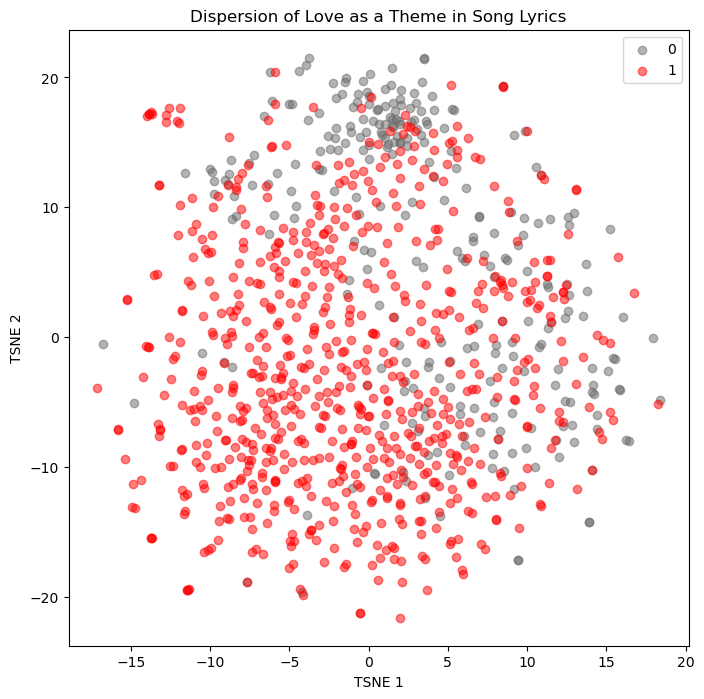

In [32]:
embedding_viz(expanded_embeddings_themes, 'Love', 'Dispersion of Love as a Theme in Song Lyrics')

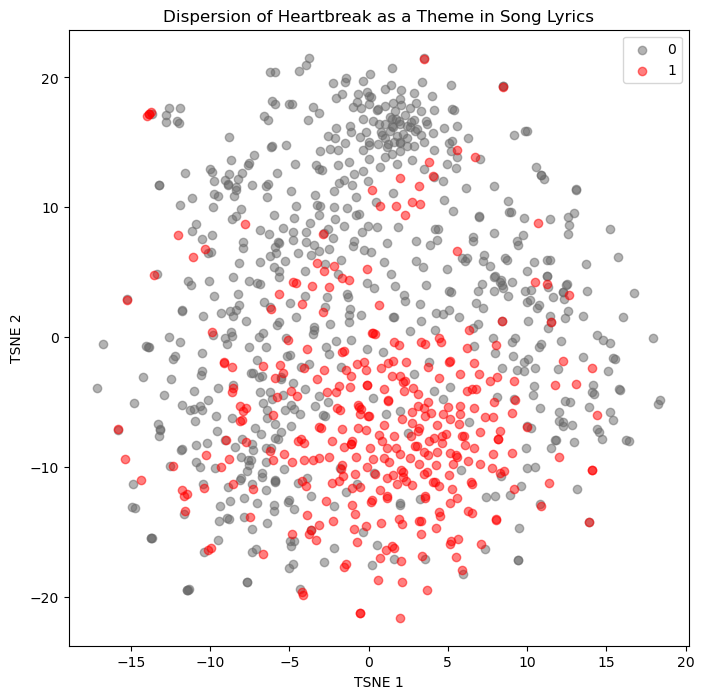

In [33]:
embedding_viz(expanded_embeddings_themes, 'Heartbreak', 'Dispersion of Heartbreak as a Theme in Song Lyrics')

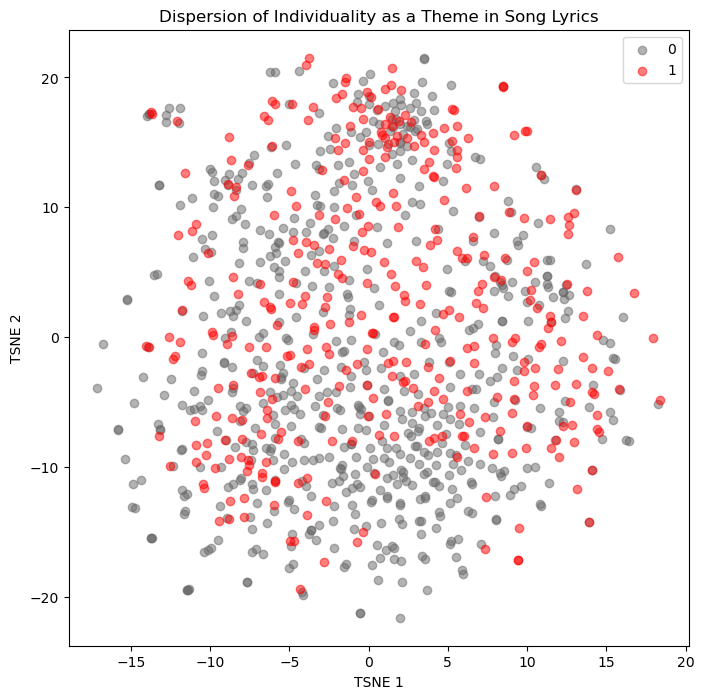

In [34]:
embedding_viz(expanded_embeddings_themes, 'Individuality', 'Dispersion of Individuality as a Theme in Song Lyrics')

Slight differences in exact positions of the points are due to the inherent stochasticity of the t-SNE algorithm. In other words, the dimension reduction and optimization processes durint t-SNE naturally introduce some randomness that can't be controlled for by random_state, resulting in slight variations in datapoints.

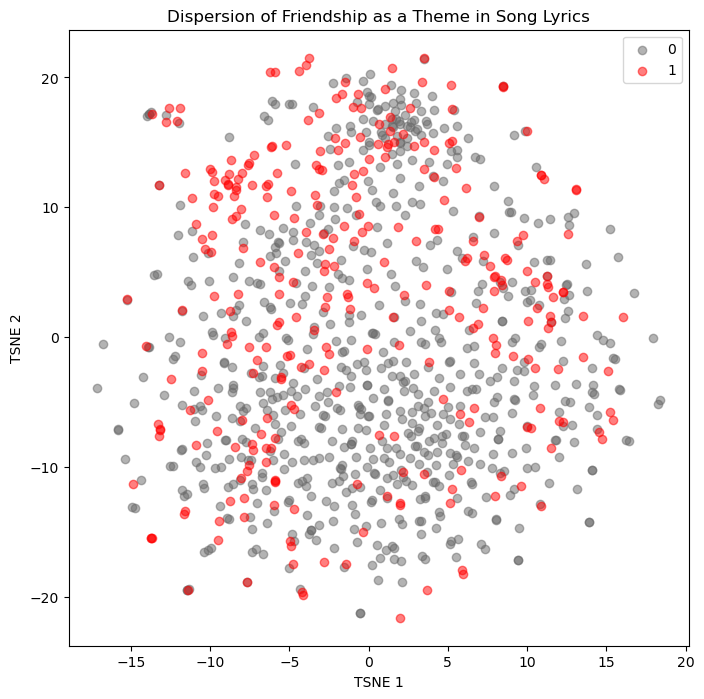

In [35]:
embedding_viz(expanded_embeddings_themes, 'Friendship', 'Dispersion of Friendship as a Theme in Song Lyrics')

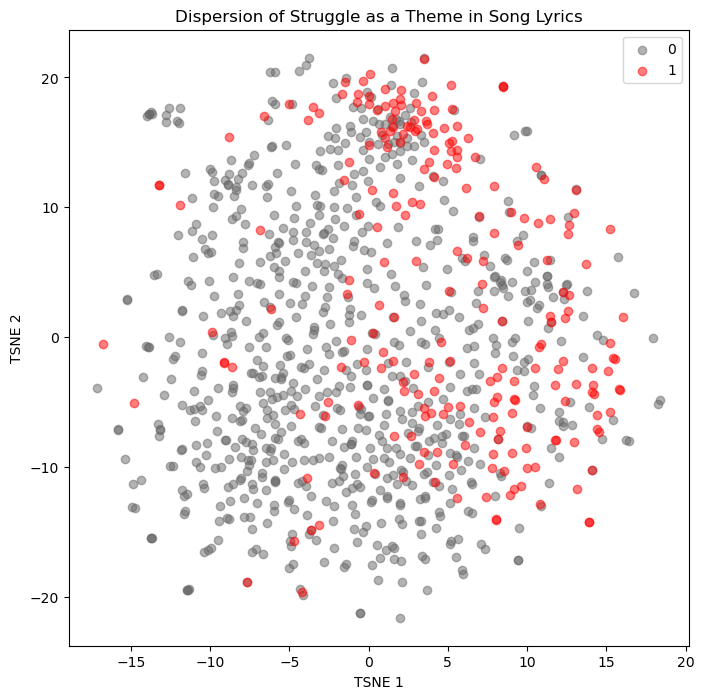

In [36]:
embedding_viz(expanded_embeddings_themes, 'Struggle', 'Dispersion of Struggle as a Theme in Song Lyrics')

(Code for 3D plot was moved because it wasn't featured in the main presentation.)

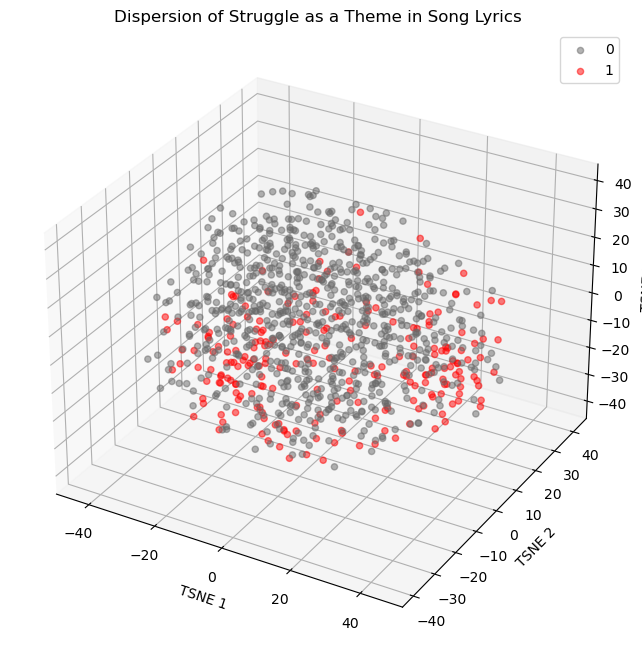

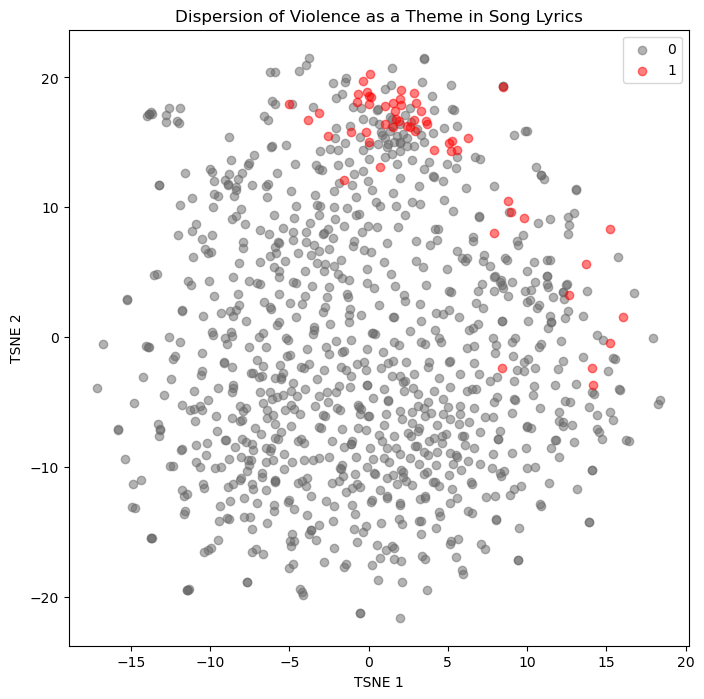

In [37]:
embedding_viz(expanded_embeddings_themes, 'Violence', 'Dispersion of Violence as a Theme in Song Lyrics')

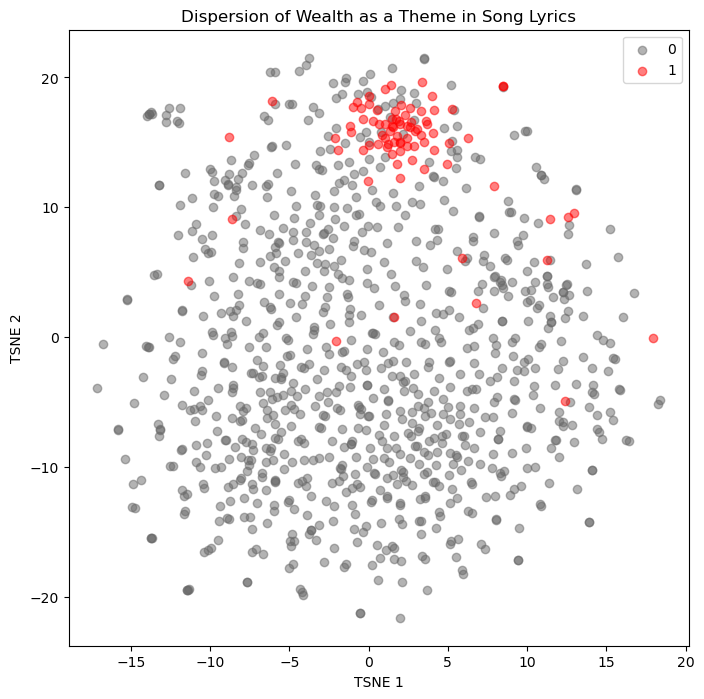

In [38]:
embedding_viz(expanded_embeddings_themes, 'Wealth', 'Dispersion of Wealth as a Theme in Song Lyrics')

### Generate subset of DF to facilitate visualization of Embedding & Themes

In [39]:
embeddings_everything = merged_df[["year", "themes", "embedding", "average_positive"]]
embeddings_everything = embeddings_everything.dropna()
embeddings_everything.shape

(25721, 4)

In [40]:
themes = [
         "Religion",
         "Love", 
         "Heartbreak", 
         "Family",
         "Individuality", 
         "Friendship",
         "Community",
         "Violence",
         "Sexuality",
         "Celebration", 
         "Struggle",
         "Wealth",
         "Adventure",
         "Fantasy"
         "Nostalgia",
         "Nature",
         "Politics",
         "Feminism"  
]
themes.sort()

for theme in themes:
    embeddings_everything[theme] = embeddings_everything['themes'].str.contains(theme).astype(int)

In [41]:
embeddings_everything[:2]

,year,themes,embedding,average_positive,Adventure,Celebration,Community,Family,FantasyNostalgia,Feminism,...,Heartbreak,Individuality,Love,Nature,Politics,Religion,Sexuality,Struggle,Violence,Wealth
0,1990,"Adventure, Wealth, Individuality, Violence","[0.046063587069511414, -0.027632707729935646, ...",0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
6,2002,"Struggle, Individuality, Bragging, Success, Co...","[0.03235654905438423, -0.05264057219028473, -0...",0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Plot distribution of Positive Sentiment Scores for songs with HEARTBREAK theme over time

In [60]:
histogram_sentiment = embeddings_everything[['year', 'average_positive']][embeddings_everything['Heartbreak'] == 1]

# Group by year
histogram_sentiment_grouped = histogram_sentiment.groupby('year')

In [63]:
histogram_sentiment

,year,average_positive
15,2023,0.000000
20,2010,0.000000
22,1995,0.000000
23,2021,0.000000
24,1976,0.000000
...,...,...
30471,2019,0.000000
30473,2019,0.000000
30475,2021,0.000000
30483,2007,0.996967


In [44]:
def gen_theme_sentiment_plot(embeddings_everything, theme, title):
    """ 
    Generate density plots.

    Inputs:
        embeddings_everything (dataframe): dataframe with embedding, year, and 
            data for that specific theme
        theme (str): theme to analyze
        title (str): title of resulting plot
    
    Returns: (plot) density plot
    """
    # Calculate relative frequency of songs with X theme by year
    histogram_sentiment = embeddings_everything[['year', 'average_positive']][embeddings_everything[theme] == 1]

    # Group by year
    histogram_sentiment_grouped = histogram_sentiment.groupby('year')

    relative_frequency = histogram_sentiment_grouped.size()

    # Normalize relative frequency to be between 0 and 1
    relative_frequency_scaled = relative_frequency / relative_frequency.max()

    # Set the size of the figure
    plt.figure(figsize=(12, 8))

    # Plot density plot
    sns.kdeplot(data=histogram_sentiment, x='year', y='average_positive', fill=True, alpha=0.5)

    # Plot line plot for relative frequency
    plt.plot(relative_frequency.index, relative_frequency_scaled.values, color='black', linestyle='--', marker='o', label='Frequency (Songs with {} Theme)'.format(theme))

    plt.title(title) # 'Density Plot: Positive Sentiment Score for Songs with "Heartbreak" Theme Decreasing Over Time'
    plt.xlabel('Year')
    plt.ylabel('Average Positive Sentiment')
    plt.legend()

    plt.show()

/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

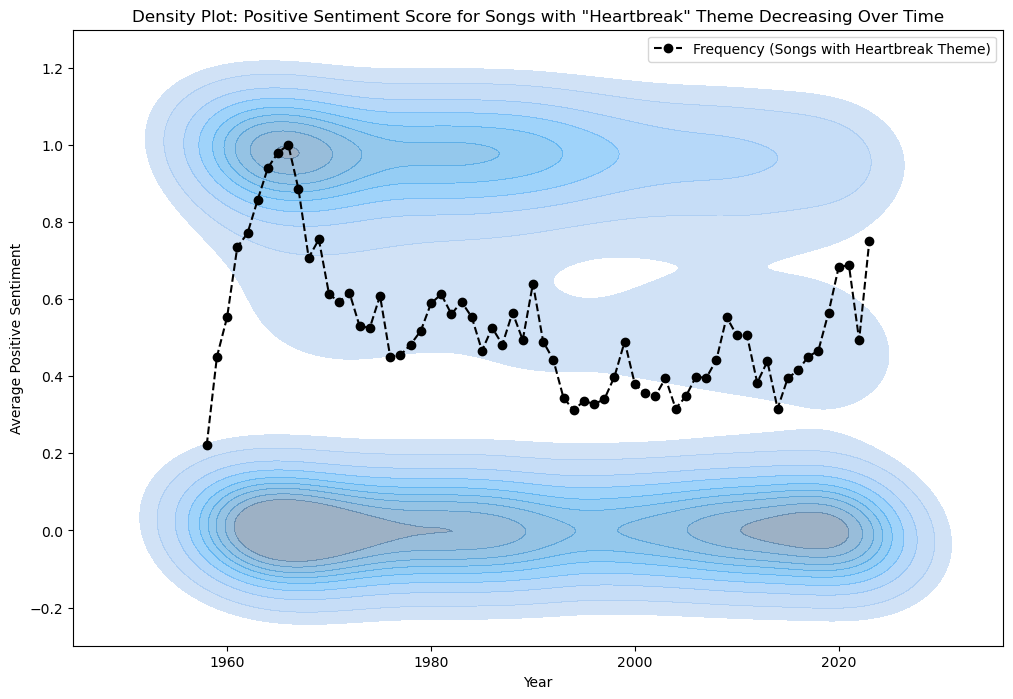

In [45]:
gen_theme_sentiment_plot(embeddings_everything, "Heartbreak", 'Density Plot: Positive Sentiment Score for Songs with "Heartbreak" Theme Decreasing Over Time')

/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

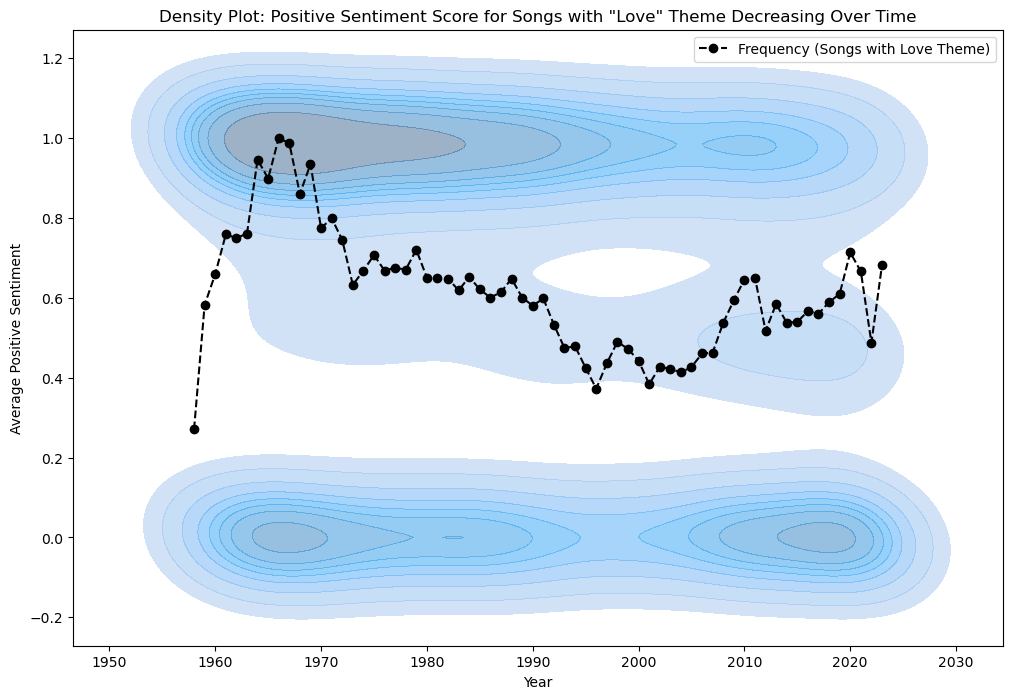

In [46]:
gen_theme_sentiment_plot(embeddings_everything, "Love", 'Density Plot: Positive Sentiment Score for Songs with "Love" Theme Decreasing Over Time')

/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

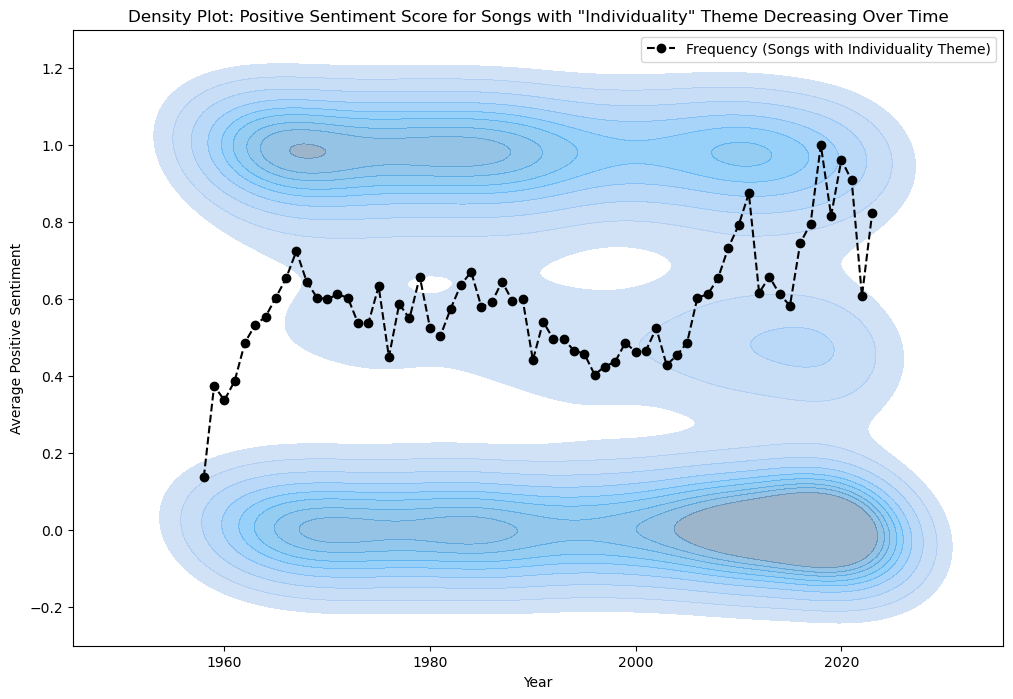

In [47]:
gen_theme_sentiment_plot(embeddings_everything, "Individuality", 'Density Plot: Positive Sentiment Score for Songs with "Individuality" Theme Decreasing Over Time')

/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

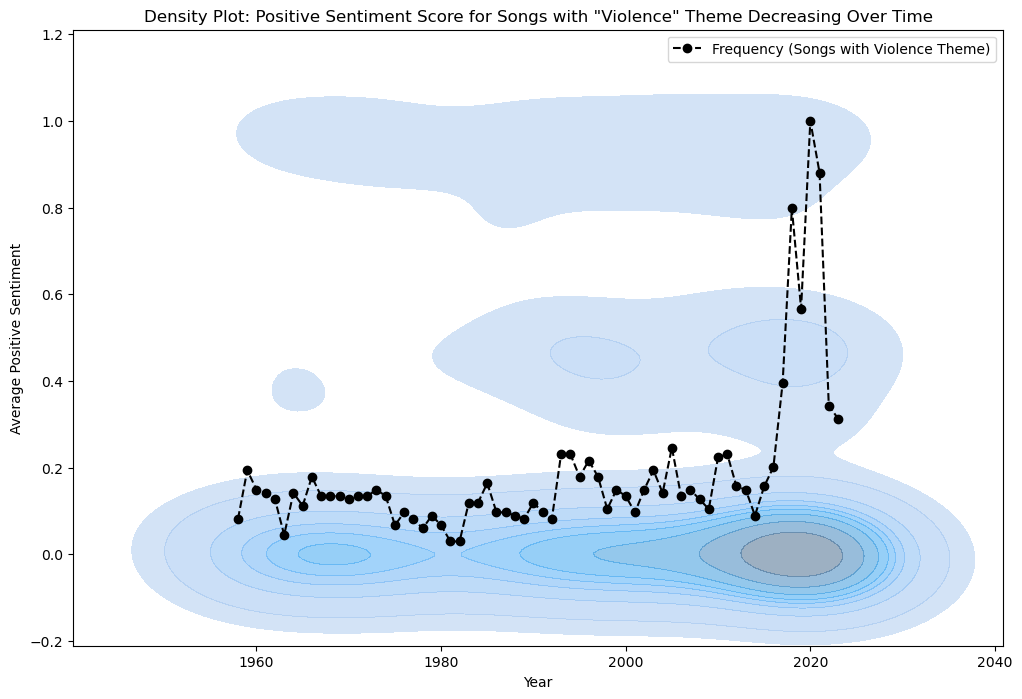

In [49]:
gen_theme_sentiment_plot(embeddings_everything, "Violence", 'Density Plot: Positive Sentiment Score for Songs with "Violence" Theme Decreasing Over Time')

/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

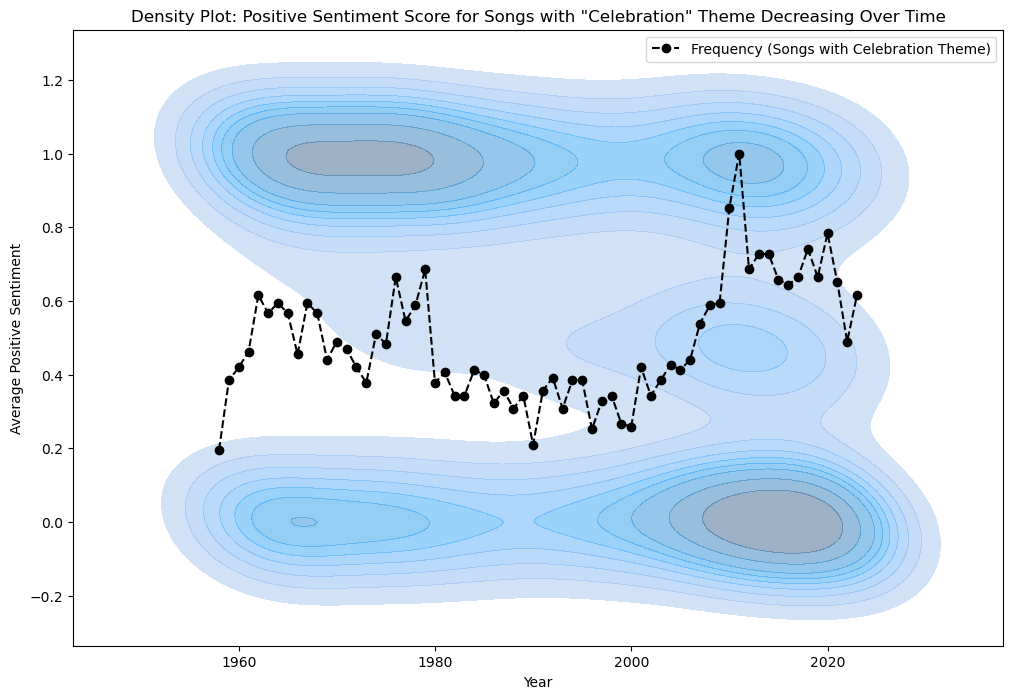

In [50]:
gen_theme_sentiment_plot(embeddings_everything, "Celebration", 'Density Plot: Positive Sentiment Score for Songs with "Celebration" Theme Decreasing Over Time')

These density plots provide some initial evidence in support of our hypothesis that artists continue to write about songs that have these themes, but they are doing so with less positive (more negative) sentiment in recent decades compared to many decades prior. 